# Energy of a Quantum Harmonic Oscillator
## Zaki Salma 18012088

The Hamiltonian for the QHO in one dimension is given by:
$$\hat H  = \hat T + \hat V = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2}k x^2  \space\space\space\space\space\space\space\space(1.0)$$

where $\hat T$ and $\hat V$ are the kinetic and potential components of the total energy of the system.

For a general wave function, the energy can be expressed as:

$$E_{\psi} = \frac {\int dx \space \psi^*(x) \hat H\psi(x)} {\int dx \space \psi^*(x)\psi(x)}\space\space\space\space\space\space(2.0)$$

## The Program

The purpose of this program will be to look at the kinetic and potential energies of a system with wave function:

$$\psi(x) = \left[\frac {2\alpha} {\pi}\right]^\frac{1}{4} \exp({-\alpha x^2})\space\space\space\space\space\space(3.0) $$


## Section 1  - Wave Function Graphs

### Imports

In [1]:
#Importing relavent modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Functions

In [8]:
#Wave Function
def f(alpha,x):
    """
    Calculates an array of wave function values
    
    Inputs: alpha - alpha value ; x - array of x values
    
    Output: psi - array of wave function values
    
    """
    #Psi Values
    psi = ((2*alpha/np.pi)**0.25)*np.exp(-1*alpha*x*x)
    return psi

#Second Derivative of Wave Function
def d2f(f,x,alpha,dx):
    """
    Calculates the second derivative of a function.
    
    Inputs: f - function to be differentiated ; x - array of x values ; alpha - alpha value  ; dx - grid spacing
    
    Ouputs: function's second derivative"""
    
    #Calls function and saves it as an array
    f = f(alpha,x)
    
    #Forward and backward shift
    f_m  = np.roll(f,1)  #f(x-dx) 
    f_p  = np.roll(f,-1) # f(x+dx)
    
    #2nd derivative
    d2f = (f_m + f_p - 2*f)/(dx*dx)
    return d2f

#Plotting Function
def plot(title,label1,label2,x,y1,y2):
    """
    Plots a two curves on a graph.
    
    Inputs: title - graph title ; label1/label2 - labels for each curve ; x - x values to plotted against ; 
                    y1/y2 - y values for each curve 
    
    Outputs: A graph showing each curve
    
    """
    
    #Figure and Axes
    fig = plt.figure(figsize=(12.8,6.4))
    ax = fig.add_subplot()

    #Title and labels
    ax.set_title(title,fontdict = {'size':20})
    ax.set_xlabel('x',fontdict = {'size':20})

    #Plotting functions
    ax.plot(x,y1, label = label1)
    ax.plot(x,y2, label = label2)

    #Sets the x and y limits
    ax.set_ylim(-2,1.5)
    ax.set_xlim(-5,5)

    #Grid and Legend
    plt.grid(True)
    plt.legend(fontsize = 16,loc=4)

#Integral Function
def I(alpha,x,f,d2f,dx):
    """
    Calculates the Integrals for equations
    
    Inputs: alpha - alpha value ; x - array of x values ; f - wave function ; 
           d2f - 2nd derivative of wave function ; dx - grid spacing
           
    Outputs: array of KE and PE values
    """
    #KE and PE values
    E_KE = integrate.simps(-0.5*f(alpha,x)*d2f(f,x,alpha,dx),x)
    E_PE = integrate.simps(0.5*f(alpha,x)*x*x*f(alpha,x),x)
    
    return np.array([E_KE,E_PE])

### Wave Function Plots

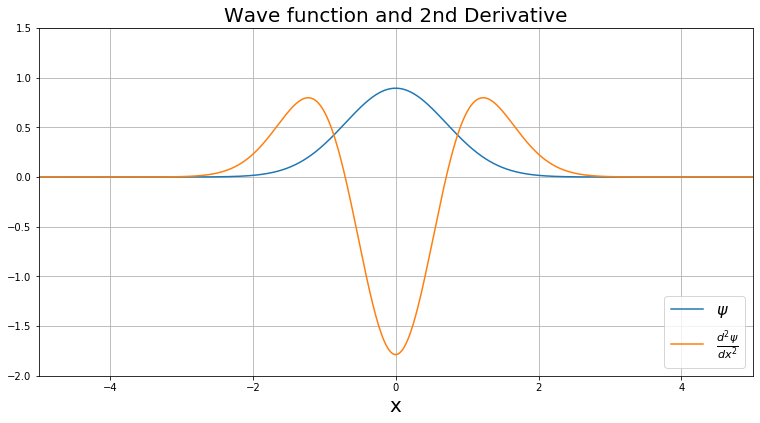

In [9]:
#Variables
alpha = 1
dx = 1e-3 #Explanation in conclusions
x = np.arange(-5,5,dx)

#Calls plot function for curves of psi and d2psi against x
plot('Wave function and 2nd Derivative',r'$\psi$',r'$\frac{d^2\psi}{dx^2}$',x,f(alpha,x),d2f(f,x,alpha,dx))

## Section 2 - Energy Evaluation 

The Kinetic and Potential energies can be evaluated by re-arranging equations $1.0$ and $2.0$ to give:

$$E_{KE} = -\frac{1}{2}\int dx\space \psi^*(x)\space \frac{d^2\psi}{dx^2} \space\space\space\space\space(4.0)$$

$$E_{PE} = \frac{1}{2}\int dx\space \psi^*(x)\space x^2 \psi(x) \space\space\space\space\space(5.0)$$


Under the simplification that $k = 1$ and for our wave function:

$$\psi^*(x) = \psi(x)$$

### KE and PE Plots

Kinetic and Potential values are: 0.49999987499973086 and 0.125 respectively. Alpha = 1


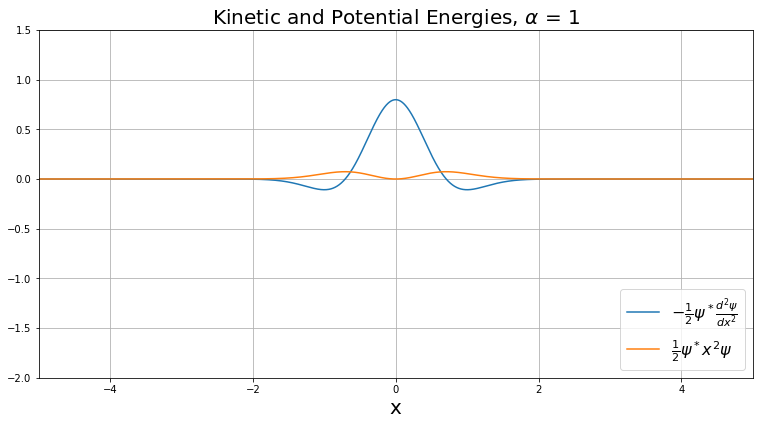

In [53]:
#Change alpha to 0.5 for corresponding energies and graph
alpha = 1

#Calls plot function for equations 4.0 and 5.0 with alpha = 0.5
plot(r'Kinetic and Potential Energies, $\alpha$ = {0}'.format(alpha),r'$-\frac{1}{2}\psi^* \frac{d^2\psi}{dx^2}$'
     ,r'$\frac{1}{2}\psi^* x^2\psi$',x,-0.5*f(alpha,x)*d2f(f,x,alpha,dx),f(alpha,x)*0.5*x*x*f(alpha,x))

#Ouputs the energy values
print("Kinetic and Potential values are: {0} and {1} respectively. Alpha = {2}"
      .format( I(alpha, x, f, d2f, dx)[0]
              ,I(alpha, x, f, d2f, dx)[1],alpha))

### Conclusions

The obtained kinetic energy is 4 times greater than the potential energy for an $\alpha$ value of 1. Looking at the plot for $\alpha$ = 1, this 4:1 ratio corresponds to the ratio between the area beneath each curve. 

For an $\alpha$ value of 0.5, the kinetic and potential energies are both equal at 0.25. The total energy 0.5 is the same as the minimum energy for the one dimensional QHO found in the week 2 assignment (also at $\alpha$ = 0.5). 

The accuracy of the KE and PE values was tested for dx between $10^{-1}$ and $10^{-5}$. dx > $10^{-2}$ is needed for smooth curves. For $\alpha$ = 1, the KE and PE values approach 0.5 and 0.125 respectively for smaller dx values. However for values of dx < $10^{-3}$ the PE strays from 0.125 while the KE continues to approach 0.5 so dx = $10^{-3}$ is used for all calculations. For dx = $10^{-5}$, the program begins to slow when producing the plots and energy values.